In [10]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt 
import numpy as np


In [11]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)


In [12]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [13]:
class Autoencoder(nn.Module):
    def __init__(self):
        # N, 784 (28*28)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #N, 784 ->  N,128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) #N, 3,
              ) 
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #N, 784 ->  N,128
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28), #N, 3
            nn.Sigmoid()  ) 

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded 

In [14]:
model = Autoencoder()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


In [16]:
epochs = 10
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1,28*28)
        recon = model(img)
        train_loss = loss_fn(recon, img)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Train Loss:{train_loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Train Loss:0.0448
Epoch:2, Train Loss:0.0423
Epoch:3, Train Loss:0.0366
Epoch:4, Train Loss:0.0423
Epoch:5, Train Loss:0.0384
Epoch:6, Train Loss:0.0402
Epoch:7, Train Loss:0.0390
Epoch:8, Train Loss:0.0374
Epoch:9, Train Loss:0.0366
Epoch:10, Train Loss:0.0376


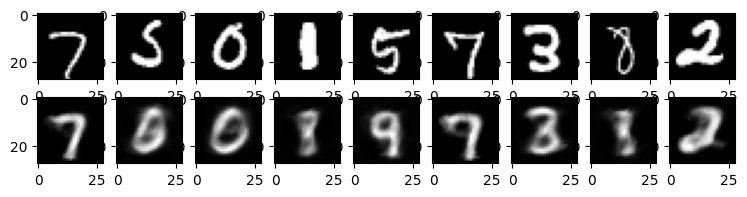

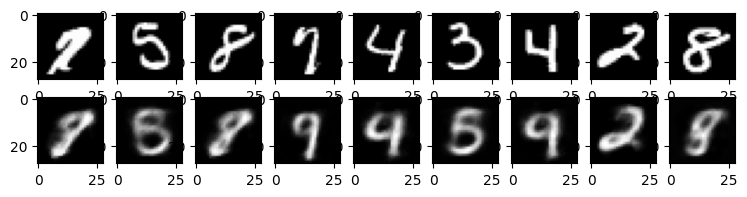

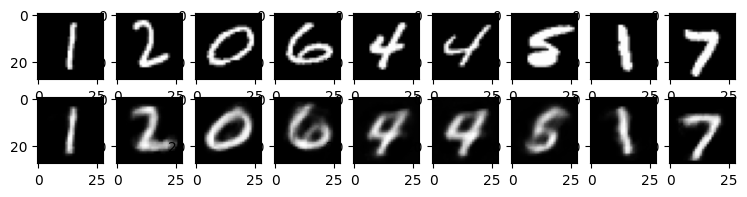

In [17]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>=9: break 
        plt.subplot(2,9, i+1)
        item = item.reshape(-1, 28,28)
        #item: 1,28,28
        plt.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i>=9: break
        plt.subplot(2,9,9+i+1) #row_length + i + 1
        item = item.reshape(-1, 28,28)
        #item: 1,28,28

        plt.imshow(item[0])


In [27]:
class CNNAutoencoder(nn.Module):
    def __init__(self):
        # N, 1, 28,28
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), #N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), #N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) #N, 64, 1, 1
              ) 
        #N, 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),            # [N, 32, 7, 7]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # [N, 16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),   # [N, 1, 28, 28]
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded 

In [28]:
model = CNNAutoencoder()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


In [29]:
epochs = 10
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        recon = model(img)
        train_loss = loss_fn(recon, img)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Train Loss:{train_loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Train Loss:0.0100
Epoch:2, Train Loss:0.0065
Epoch:3, Train Loss:0.0043
Epoch:4, Train Loss:0.0035
Epoch:5, Train Loss:0.0031
Epoch:6, Train Loss:0.0033
Epoch:7, Train Loss:0.0031
Epoch:8, Train Loss:0.0032
Epoch:9, Train Loss:0.0032
Epoch:10, Train Loss:0.0026


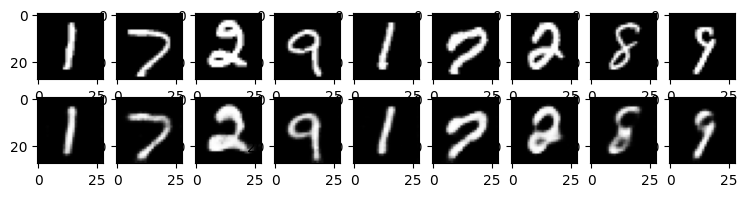

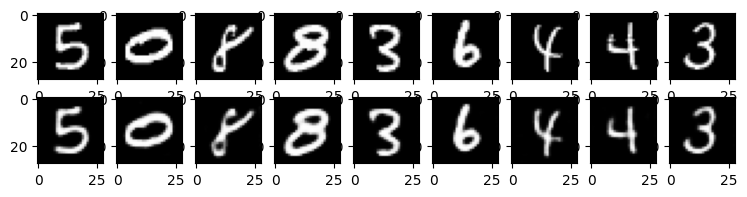

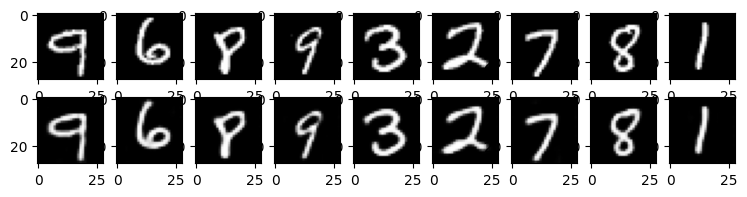

In [30]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i>=9: break 
        plt.subplot(2,9, i+1)
        #item: 1,28,28
        plt.imshow(item[0])
    
    for i, item in enumerate(recon):
        if i>=9: break
        plt.subplot(2,9,9+i+1) #row_length + i + 1

        #item: 1,28,28

        plt.imshow(item[0])
